Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. You can add a new cell and set the type as "Markdown" so you can include your answers in this notebook.

Below, please fill in your name:

In [1]:
NAME = "Xiaohong Lu"
NAME

'Xiaohong Lu'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('TitanicData.csv')
df

df.describe()
df.info()

#how many men vs. women were on board, 
df['Sex'].value_counts()
#and how many survived in each group
df1=df[df['Survived']==1]
df1.groupby(['Survived','Sex'])['Sex'].count()

#how many men vs. women were traveling with families of 3 or more members
df2=df
df2['FamilySize'] = df.apply(lambda row: row.SibSp + 
                                  (row.Parch+1), axis = 1)
df2[df2['FamilySize']>=3].groupby(['Sex'])['PassengerId'].count()

#how many were traveling alone or in pairs
df2[df2['FamilySize']<=2].groupby(['Sex'])['PassengerId'].count()

#how many passengers departed from each of the 3 ports
df.groupby(['Embarked'])['Parch'].sum()

#how many passengers were in each class (can be inferred from the cabin variable) 
df.groupby('Pclass')['Cabin'].nunique()

#how many passengers paid high vs. low fare tickets
df.groupby('Pclass')['Fare'].mean()
(df[(df['Pclass']==1) & (df['Fare']>88.961582)]['Sex'].count())-(df[(df['Pclass']==1) & (df['Fare']<88.961582)]['Sex'].count())+(df[(df['Pclass']==2) & (df['Fare']>21.471556)]['Sex'].count())-(df[(df['Pclass']==2) & (df['Fare']<21.471556)]['Sex'].count())+(df[(df['Pclass']==3) & (df['Fare']>13.229435)]['Sex'].count())-(df[(df['Pclass']==3) & (df['Fare']<13.229435)]['Sex'].count())

#Define a function to classify each person in an age group with the following groupings: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 60+. Add a new column in the DataFrame which identifies each person's age group. Then, count the number of survivalists in each age group
bins = [-1, 10,20,30,40,50,60,70]
labels=['0-10','11-20','21-30','31-40','41-50','51-60','60+']
df=df.groupby(pd.cut(df['Age'], bins=bins, labels=labels)).size()
print (df)

Conduct additional analysis to identify which passengers were most likely to survive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('TitanicData.csv')
df_num = df[['Age','SibSp','Parch','Fare']]

sns.heatmap(df_num.corr())
#Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
#The average age of survivors is 28, so young people tend to survive more. #People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario. #In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates #And if you are a child, and have siblings, you have less of a chance of surviving

df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
#Survived: Most of the people died in the shipwreck, only around 300 people survived. #Pclass: The majority of the people traveling, had tickets to the 3rd class. #Sex: There were more males than females aboard the ship, roughly double the amount. #Embarked: Most of the passengers boarded the ship from Southampton.

print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

#Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building. #Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario. #Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

#How did you approach your analysis using Python? Which functionalities did you use? Why?

I first studied the data by deploy head(), info() & describe ()functions to understand the data better. The next step I explored the data using the functions under Pandas either sum(), mean(), max(), min() to find out the patterns and to analyze them based on assumption made to see if the analysis supports the assumption. The following step I used matplotlib and seaborn to visualize the analysis so as to understand it better. If there's chance to further the analysis, I will use sklearn to build and tune a supervised learning model, a random forest for predicting the survival rate.

## Assignment 3 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze data on the passengers aboard the Titanic.

Use the .csv file provided. The definition of all variables can be found below:


- survival --> Survival --> 0 = No, 1 = Yes
- pclass --> Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd
- sex --> Sex --> M = Male, F = Female
- Age --> Age in years
- sibsp --> # of siblings / spouses aboard the Titanic
- parch --> # of parents / children aboard the Titanic
- ticket --> Ticket number
- fare --> Passenger fare --> Price paid for the fare
- cabin --> Cabin number
- embarked --> Port of Embarkation --> C = Cherbourg, Q = Queenstown, S = Southampton

The main purpose of this assignment is to identify which passengers were more likely to survive the Titanic.

**Part 1.**  _(25 points)_
* Import the data into a pandas DataFrame (1 point)

* Use the describe() and info() functions to assess the data. What can you conclude? (2 points)

* Write a function to identify how many men vs. women were on board, and how many survived in each group (3 points)

* Write a function to identify how many men vs. women were traveling with families of 3 or more members, and how many were traveling alone or in pairs (3 points)

* Write a function to identify how many passengers departed from each of the 3 ports (1 point)

* Write a function to identify how many passengers were in each class (can be inferred from the cabin variable) (1 point)

* Write a function toidentify how many passengers paid high vs. low fare tickets (1 point)

* Define a function to classify each person in an age group with the following groupings: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 60+. Add a new column in the DataFrame which identifies each person's age group. Then, count the number of survivalists in each age group (8 points)

* Now that you have some basic information about the passengers, conduct additional analysis to identify which passengers were most likely to survive. You should assess all the variables provided and anchor on the Survived variable. As a hint, you should also combine variables. For example, were all women equally as likely to survive? Or only those with larger families or those who were younger? (5 points)

**Part 2.**  _(5 points)_
* How did you approach your analysis using Python? Which functionalities did you use? Why?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('TitanicData.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#We can see that count of Age column is 714, mean is 29.6, standard deviation is 14.52 and so on. There are some missing values in this column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.1+ KB


#We can see the index dtype and column dtypes, non-null values and memory usage.

In [6]:
#how many men vs. women were on board, 
df['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [7]:
#and how many survived in each group
df1=df[df['Survived']==1]
df1.groupby(['Survived','Sex'])['Sex'].count()

Survived  Sex   
1         female    197
          male       93
Name: Sex, dtype: int64

In [8]:
#how many men vs. women were traveling with families of 3 or more members
df2=df
df2['FamilySize'] = df.apply(lambda row: row.SibSp + 
                                  (row.Parch+1), axis = 1)
df2[df2['FamilySize']>=3].groupby(['Sex'])['PassengerId'].count()

Sex
female    89
male      82
Name: PassengerId, dtype: int64

In [9]:
#how many were traveling alone or in pairs
df2[df2['FamilySize']<=2].groupby(['Sex'])['PassengerId'].count()

Sex
female    172
male      371
Name: PassengerId, dtype: int64

In [10]:
#how many passengers departed from each of the 3 ports
df.groupby(['Embarked'])['Parch'].sum()

Embarked
C     54
Q     11
S    243
Name: Parch, dtype: int64

In [11]:
#how many passengers were in each class (can be inferred from the cabin variable) 
df.groupby('Pclass')['Cabin'].nunique()

Pclass
1    122
2      7
3      5
Name: Cabin, dtype: int64

In [12]:
#how many passengers paid high vs. low fare tickets
df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.961582
2    21.471556
3    13.229435
Name: Fare, dtype: float64

In [13]:
(df[(df['Pclass']==1) & (df['Fare']>88.961582)]['Sex'].count())-(df[(df['Pclass']==1) & (df['Fare']<88.961582)]['Sex'].count())+(df[(df['Pclass']==2) & (df['Fare']>21.471556)]['Sex'].count())-(df[(df['Pclass']==2) & (df['Fare']<21.471556)]['Sex'].count())+(df[(df['Pclass']==3) & (df['Fare']>13.229435)]['Sex'].count())-(df[(df['Pclass']==3) & (df['Fare']<13.229435)]['Sex'].count())

-236

In [14]:
#Define a function to classify each person in an age group with the following groupings: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 60+. Add a new column in the DataFrame which identifies each person's age group. Then, count the number of survivalists in each age group
bins = [-1, 10,20,30,40,50,60,70]
labels=['0-10','11-20','21-30','31-40','41-50','51-60','60+']
df=df.groupby(pd.cut(df['Age'], bins=bins, labels=labels)).size()
print (df)

Age
0-10      64
11-20    115
21-30    230
31-40    155
41-50     86
51-60     42
60+       17
dtype: int64


# Conduct additional analysis to identify which passengers were most likely to survive

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('TitanicData.csv')
df_num = df[['Age','SibSp','Parch','Fare']]

<AxesSubplot:>

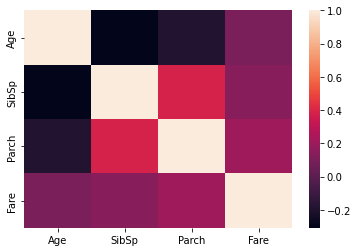

In [16]:
sns.heatmap(df_num.corr())

#Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.

In [17]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.965456,0.365566,0.525943
1,28.343690,51.843205,0.527586,0.493103


#The average age of survivors is 28, so young people tend to survive more.
#People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
#In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
#And if you are a child, and have siblings, you have less of a chance of surviving

In [18]:
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


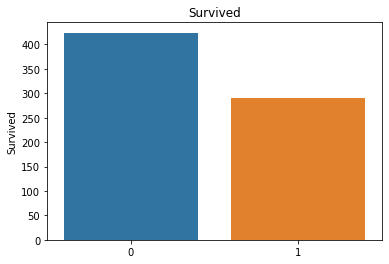

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


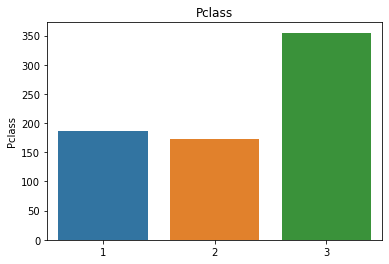

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


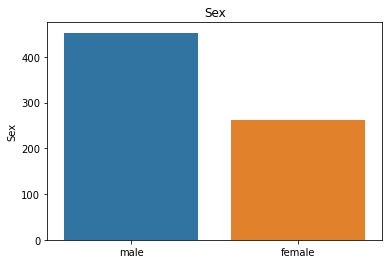

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


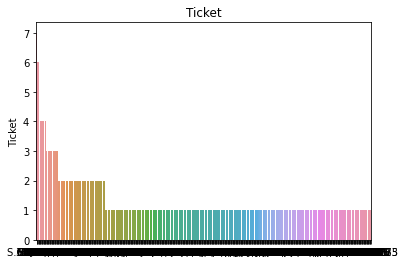

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


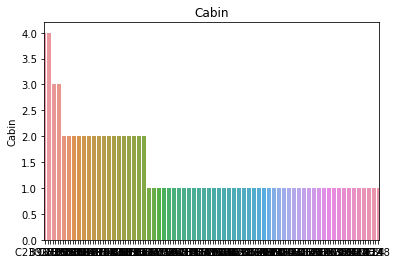

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


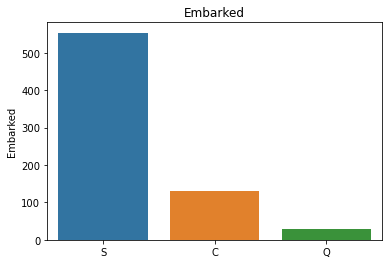

In [19]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

#Survived: Most of the people died in the shipwreck,  only around 300 people survived.
#Pclass: The majority of the people traveling, had tickets to the 3rd class.
#Sex: There were more males than females aboard the ship, roughly double the amount.
#Embarked: Most of the passengers boarded the ship from Southampton.

In [20]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          64  90  270
1         122  83   85

Sex       female  male
Survived              
0             64   360
1            197    93

Embarked   C   Q    S
Survived             
0         51  20  353
1         79   8  201


#Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
#Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
#Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

# Part 2

#How did you approach your analysis using Python? Which functionalities did you use? Why?

I first studied the data by deploy head(), info() & describe ()functions to understand the data better. The next step I explored the data using the functions under Pandas either sum(), mean(), max(), min() to find out the patterns and to analyze them based on assumption made to see if the analysis supports the assumption. The following step I used matplotlib and seaborn to visualize the analysis so as to understand it better. If there's chance to further the analysis, I will use sklearn to build and tune a supervised learning model, a random forest for predicting the survival rate. 